<h2>3:00:00 / 3:11:52</h2>

<h1>Workflow</h1>

<pre>
    0. Import important liberaries
    1. Get data ready (turn into tensors and batches)
    2. Build a logistic regression model
    3. Pick loss function and optimizer
    4. Build a training loop
    5. Evaluate your model
    6. How to improve our model
    7. Save your model
</pre>

<h2>0. Import important liberaries</h2>

In [1]:
import time
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

<h2>1. Get data ready (turn into tensors and batches</h2>

<h3>Download datasets</h3>

In [2]:
train_dataset = datasets.FashionMNIST(root="/dataset", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.FashionMNIST(root="/dataset", train=False, transform=transforms.ToTensor())

In [3]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

<h2>2. Convert data into batches</h2>

In [5]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
len(train_loader) # 60000 / 64 = 938

938

In [7]:
len(test_loader) #10000 / 64 = 157

157

<h2>3. Build logistic model</h2>

In [8]:
class LogisticRegression(nn.Module):
    def __init__(self, in_dim, n_class):
        super().__init__()
        self.linear = nn.Linear(in_dim, n_class)

    def forward(self, x):
        out = self.linear(x)
        return out

In [9]:
model = LogisticRegression(28*28, 10) #28*28 = 784

In [10]:
model

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [11]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 1.7476e-02, -1.7340e-02,  2.0943e-02,  ..., -6.4743e-03,
                        1.8810e-02,  1.2715e-02],
                      [-2.8401e-03, -2.0842e-02, -1.4104e-02,  ...,  1.8945e-02,
                        4.3889e-03,  2.6067e-02],
                      [-3.7806e-03,  1.2813e-02,  2.9054e-02,  ...,  7.5983e-03,
                       -1.9455e-02, -2.1282e-02],
                      ...,
                      [-1.5388e-02,  3.4557e-02,  2.9585e-03,  ..., -1.2275e-02,
                       -2.1030e-03,  3.0008e-02],
                      [-2.8176e-02,  8.1107e-03,  1.2824e-02,  ..., -5.7282e-03,
                       -1.2861e-02,  1.7367e-02],
                      [ 7.3392e-04, -3.2260e-02,  2.7640e-02,  ...,  2.2795e-02,
                        5.4512e-03,  1.4555e-05]])),
             ('linear.bias',
              tensor([ 0.0291, -0.0236, -0.0335,  0.0231,  0.0045, -0.0119,  0.0155, -0.0187,
                       0.0139,

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' #Code for GPU

In [13]:
device

'cuda'

In [14]:
model = model.to(device) #Send model to tun at GPU

<h2>4. Pick a loss function and optimizer</h2>

In [15]:
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [16]:
list(model.parameters())

[Parameter containing:
 tensor([[ 1.7476e-02, -1.7340e-02,  2.0943e-02,  ..., -6.4743e-03,
           1.8810e-02,  1.2715e-02],
         [-2.8401e-03, -2.0842e-02, -1.4104e-02,  ...,  1.8945e-02,
           4.3889e-03,  2.6067e-02],
         [-3.7806e-03,  1.2813e-02,  2.9054e-02,  ...,  7.5983e-03,
          -1.9455e-02, -2.1282e-02],
         ...,
         [-1.5388e-02,  3.4557e-02,  2.9585e-03,  ..., -1.2275e-02,
          -2.1030e-03,  3.0008e-02],
         [-2.8176e-02,  8.1107e-03,  1.2824e-02,  ..., -5.7282e-03,
          -1.2861e-02,  1.7367e-02],
         [ 7.3392e-04, -3.2260e-02,  2.7640e-02,  ...,  2.2795e-02,
           5.4512e-03,  1.4555e-05]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.0291, -0.0236, -0.0335,  0.0231,  0.0045, -0.0119,  0.0155, -0.0187,
          0.0139,  0.0020], device='cuda:0', requires_grad=True)]

In [17]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 1.7476e-02, -1.7340e-02,  2.0943e-02,  ..., -6.4743e-03,
                        1.8810e-02,  1.2715e-02],
                      [-2.8401e-03, -2.0842e-02, -1.4104e-02,  ...,  1.8945e-02,
                        4.3889e-03,  2.6067e-02],
                      [-3.7806e-03,  1.2813e-02,  2.9054e-02,  ...,  7.5983e-03,
                       -1.9455e-02, -2.1282e-02],
                      ...,
                      [-1.5388e-02,  3.4557e-02,  2.9585e-03,  ..., -1.2275e-02,
                       -2.1030e-03,  3.0008e-02],
                      [-2.8176e-02,  8.1107e-03,  1.2824e-02,  ..., -5.7282e-03,
                       -1.2861e-02,  1.7367e-02],
                      [ 7.3392e-04, -3.2260e-02,  2.7640e-02,  ...,  2.2795e-02,
                        5.4512e-03,  1.4555e-05]], device='cuda:0')),
             ('linear.bias',
              tensor([ 0.0291, -0.0236, -0.0335,  0.0231,  0.0045, -0.0119,  0.0155, -0.0187,
             

<h2>5. Building a training loop</h2>

In [18]:
num_epochs = 8
for epoch in range(num_epochs):
    print('* ' *24)
    print(f'epoch {epoch +1}')
    since = time.time()
    running_loss = 0.0
    running_accu = 0.0
    model.train()
    for i, data in enumerate(train_loader, 1): #937
        img, label = data
        img = img.view(img.size(0),-1)
        img = img.to(device)
        label = label.to(device)
        out = model(img) #forward pass
        loss = criterion(out, label)
        running_loss += loss.item()
        _,pred = torch.max(out, 1)
        running_accu += (pred == label).float().mean()
        optimizer.zero_grad()
        loss.backward() #backward pass
        optimizer.step()
        if i % 300 == 0:
            print(f'[{epoch+1} / {num_epochs}], Loss: {running_loss / i:.6f}, Accuracy: {running_accu/i:.6f}')
    print(f'Finish {epoch+1} Epoch, Loss: {running_loss/i:.6f}, Accu: {running_accu/i:.6f}')

    
    """6. Evaluate your model"""
    model.eval()
    eval_loss = 0.
    eval_accu = 0.
    for data in test_loader:
        img,label = data
        img = img.view(img.size(0),-1)
        img = img.to(device)
        label = label.to(device)
        with torch.no_grad():
            out = model(img)
            loss = criterion(out,label)
        eval_loss += loss.item()
        _,pred = torch.max(out, 1)
        eval_accu += (pred == label).float().mean()
    print()
    
    print(f'Test loss: {eval_loss / len(test_loader):.6f}, Accu: {eval_accu / len(train_loader):.6f}')
    print(f'Time:{(time.time() - since):.1f} s')


* * * * * * * * * * * * * * * * * * * * * * * * 
epoch 1
[1 / 8], Loss: 2.044868, Accuracy: 0.339323
[1 / 8], Loss: 1.863166, Accuracy: 0.464141
[1 / 8], Loss: 1.729100, Accuracy: 0.524444
Finish 1 Epoch, Loss: 1.713695, Accu: 0.530217

Test loss: 1.367545, Accu: 0.107476
Time:10.5 s
* * * * * * * * * * * * * * * * * * * * * * * * 
epoch 2
[2 / 8], Loss: 1.297172, Accuracy: 0.662917
[2 / 8], Loss: 1.251356, Accuracy: 0.664036
[2 / 8], Loss: 1.210180, Accuracy: 0.666944
Finish 2 Epoch, Loss: 1.206483, Accu: 0.666828

Test loss: 1.105362, Accu: 0.111457
Time:10.6 s
* * * * * * * * * * * * * * * * * * * * * * * * 
epoch 3
[3 / 8], Loss: 1.066264, Accuracy: 0.683281
[3 / 8], Loss: 1.047992, Accuracy: 0.685547
[3 / 8], Loss: 1.029327, Accuracy: 0.687483
Finish 3 Epoch, Loss: 1.026755, Accu: 0.688166

Test loss: 0.984126, Accu: 0.114989
Time:10.8 s
* * * * * * * * * * * * * * * * * * * * * * * * 
epoch 4
[4 / 8], Loss: 0.952178, Accuracy: 0.702812
[4 / 8], Loss: 0.944634, Accuracy: 0.705104


<h2>7. Visualize how model is doing</h2>

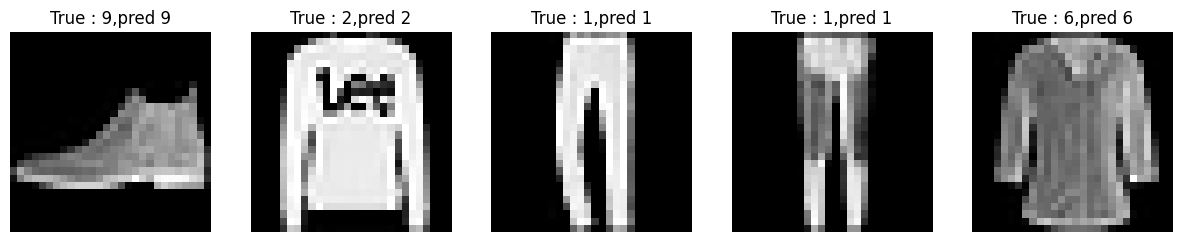

In [22]:
images, labels = next(iter(test_loader))
images = images.reshape(-1,28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_,predicted = torch.max(outputs,1)
fig,ax = plt.subplots(1,5,figsize=(15,3))
for i in range(5):
    ax[i].imshow(images[i].reshape(28,28).cpu(),cmap='gray')
    ax[i].set_title(f'True : {labels[i].item()},pred {predicted[i].item()}')
    ax[i].axis('off')
plt.show()

<h2>7. Save the model</h2>

In [23]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 1.7476e-02, -1.7314e-02,  2.1110e-02,  ..., -1.0286e-02,
                        1.7673e-02,  1.2647e-02],
                      [-2.8411e-03, -2.0844e-02, -1.4124e-02,  ...,  1.7927e-02,
                        4.0824e-03,  2.6032e-02],
                      [-3.7830e-03,  1.2813e-02,  2.9050e-02,  ...,  1.2801e-02,
                       -1.8833e-02, -2.1187e-02],
                      ...,
                      [-1.5388e-02,  3.4554e-02,  2.9455e-03,  ..., -1.3931e-02,
                       -2.6679e-03,  2.9951e-02],
                      [-2.8176e-02,  8.1043e-03,  1.2749e-02,  ..., -8.3920e-03,
                       -1.3435e-02,  1.7340e-02],
                      [ 7.3313e-04, -3.2261e-02,  2.7618e-02,  ...,  2.3309e-02,
                        5.9440e-03,  7.8882e-05]], device='cuda:0')),
             ('linear.bias',
              tensor([ 0.0250, -0.0181, -0.0702,  0.0131, -0.0974,  0.2473,  0.0239,  0.0042,
             

In [24]:
torch.save(model.state_dict(),'./LogisticRegression_model.pth')